# Heuristic Policy from Topological Value


---

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from aegomoku.gomoku_board import expand
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.gomoku_game import GomokuGame

2022-10-02 18:09:24.555033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
BOARD_SIZE = 19

In [20]:
from aegomoku.gomoku_game import ConstantBoardInitializer
from aegomoku.policies.topological_value import TopologicalValuePolicy

initializer = ConstantBoardInitializer(stones='H5C7H6C6H7I2H8')
game = GomokuGame(BOARD_SIZE, initializer=initializer)

policy = TopologicalValuePolicy(game=game)

board = game.get_initial_board()

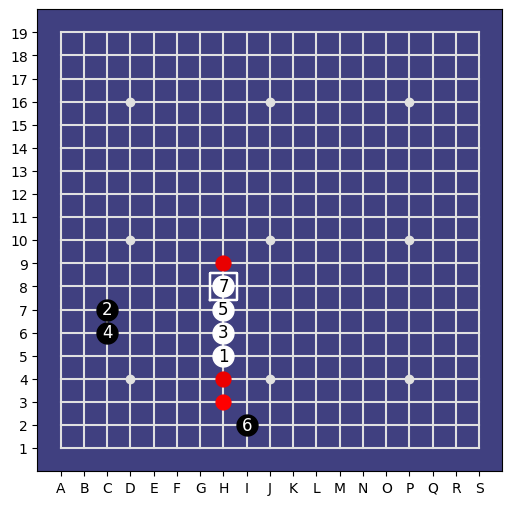

In [17]:
from aegomoku.utils import analyse_board

analyse_board(BOARD_SIZE, board.get_stones(), policy=policy)

In [23]:
stones = [board.Stone(i) for i in [101, 41, 102, 42, 362, 103, 199, 104, 200]]
stones

KeyboardInterrupt: 

## The policy in action

In [5]:
state = board.canonical_representation()
probs, v = policy.evaluate(state)
print((np.reshape(probs, (BOARD_SIZE, BOARD_SIZE))*999).astype(int))
print(v)
advice = policy.get_advisable_actions(state)
print([board.Stone(i) for i in advice])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   2   0   0   0   2   0   0   0]
 [  0   0   2   0  17   0   2   2   2   0   2   0   2   0   0]
 [  0   0   0   2   0  27   2   3   2   2   0   2   0   0   0]
 [  0   0   0   0   3   0 417   3   4   0   3   0   0   0   0]
 [  0   0   0   2   2  42  47   0   5   5   2   2   0   0   0]
 [  0   0   2   2   2   2   0  32   0   2   2   2   2   0   0]
 [  0   0   0   0   0   2   3  64   3  37   0   0   0   0   0]
 [  0   0   0   0   2   0  37   2  37   0  27   0   0   0   0]
 [  0   0   0   2   0   2   2   2   2   2   0  17   0   0   0]
 [  0   0   2   0   2   0   2   0   2   0   2   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
-0.14276335
[E11, F10, G9, F8, G8, I8, J8, H7, H6, J6,

#### The detector counts all exclusively owned lines of five
The 40 feature maps are made of 5 packages of 8. Each package is dedicated to one positional pattern.
Each package of 8 consists of 2 packages of 4, each dedicated to a single channel (current or other).
Each package of 4 describes the four orientations of the lines.

The sums over orientation (d) and shift (s) are performed by hand-crafted convolutional layers

In [6]:
import tensorflow as tf
y = policy.detector(expand(state))
y.shape

TensorShape([1, 17, 17, 40])

The feature maps are added in a pseudo-euclidean manner, the well-known exponent of 2 replaced by some hyperparameters kappa_s and kappa_d for summing the values over the shifts and orientations

In [7]:
y = tf.math.pow(y, policy.kappa_s)
y.shape

TensorShape([1, 17, 17, 40])

In [8]:
y = policy.sum_s(y)
y.shape

TensorShape([1, 17, 17, 8])

In [9]:
print(np.squeeze(y)[:, :, 7])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
y = tf.math.pow(y, policy.kappa_d/policy.kappa_s)

In [11]:
y = policy.sum_d(y)
y = tf.math.pow(y, 1 / policy.kappa_d)

#### Summing over orientation and shift leaves two feature maps, one for current, one for the other player.

In [12]:
print((np.squeeze(y)[:, :, 0] * 10).astype(int))
print()
print((np.squeeze(y)[:, :, 1] * 10).astype(int))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 11 11 11  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10 12 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0 12  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0 11  0  0 11  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0 10  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 

The sum of the line counts feeds into the a softmax for the policy estimate, the difference feeds into a tanh for the value estimate

In [13]:
probs, v = policy.evaluate(state)
print((np.reshape(probs, (BOARD_SIZE, BOARD_SIZE))*999).astype(int))
print(v)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   2   0   0   0   2   0   0   0]
 [  0   0   2   0  17   0   2   2   2   0   2   0   2   0   0]
 [  0   0   0   2   0  27   2   3   2   2   0   2   0   0   0]
 [  0   0   0   0   3   0 417   3   4   0   3   0   0   0   0]
 [  0   0   0   2   2  42  47   0   5   5   2   2   0   0   0]
 [  0   0   2   2   2   2   0  32   0   2   2   2   2   0   0]
 [  0   0   0   0   0   2   3  64   3  37   0   0   0   0   0]
 [  0   0   0   0   2   0  37   2  37   0  27   0   0   0   0]
 [  0   0   0   2   0   2   2   2   2   2   0  17   0   0   0]
 [  0   0   2   0   2   0   2   0   2   0   2   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
-0.14276335
